# Nov 28th, 2022 (SLC: indiv)

**Motivation**: generate networks at the individual level <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Fig dir

In [2]:
nn = 512
perc = 15
fig_dir = 'Fig2_OCs'
fig_dir = pjoin(fig_base_dir, 'paper2.0', f'n{nn}-p{perc}', fig_dir)
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/Fig2_OCs

## Prepare (512)

In [3]:
num_k = 7
mice = Mice(nn)

## Results

In [4]:
%%time

results = similiarity_results(
    mice=mice,
    perc=perc,
    num_k=num_k,
    merge_thres=0.444,
    n_resamples=None,
)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 14.5 s, sys: 12.8 s, total: 27.2 s
Wall time: 1min 13s


['bt_dict', 'props_bo', 'props_ca', 'pi_sorted', 'sim', 'sim_overall']

## Save dir

In [5]:
save_dir = pjoin(fig_dir, f"K{num_k}")
os.makedirs(save_dir, exist_ok=True)
print(save_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/Fig2_OCs/K7

## OCs

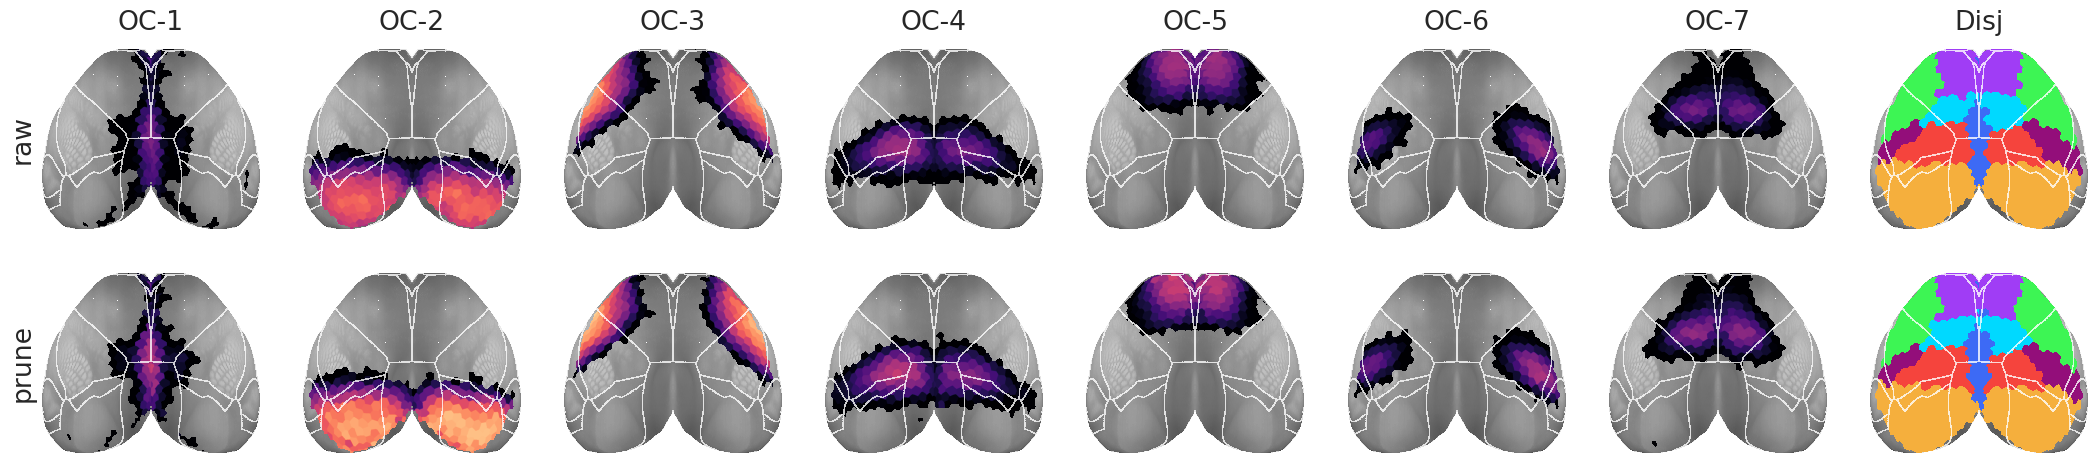

In [6]:
_ = bt.show(
    data={
        'raw': avg(results['bt_dict'][BOLD].run_pi),
        'prune': avg(results['bt_dict'][BOLD].pi_prune)},
    **show_kws(num_k),
)


## Save indiv plots

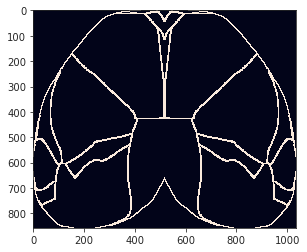

In [7]:
contour = bt.get_contour(0.2, True)
kwargs = {
    'base': bt,
    'vmin': 0.2,
    'vmax': 0.9,
    'cbar': False,
    'cmap': 'magma',
    'contour': contour,
    'contour_alpha': 0.8,
    'interp': 'antialiased',
    'mask_thres': 1 / num_k,
}
plt.imshow(contour);

In [9]:
pi_indiv = {
    k: avg(o.run_pi, 2, 1) for
    k, o in results['bt_dict'].items()
}

In [37]:
mode2lbl = {
    BOLD: 'BOLD',
    CAS: 'CAS',
    CAF: 'CAF',
}
kws_fig['transparent'] = False

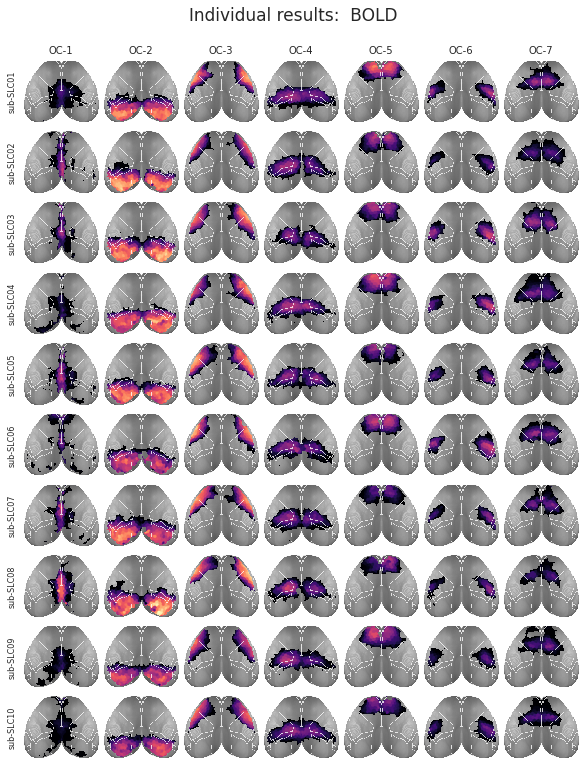

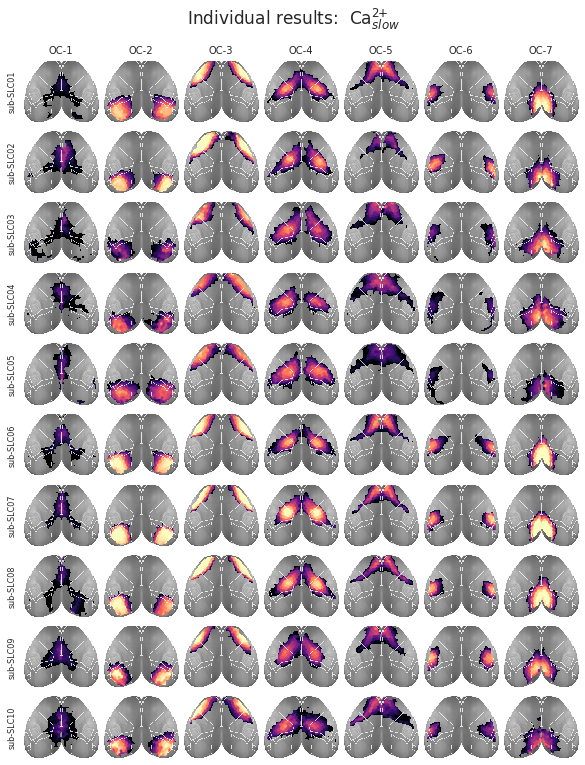

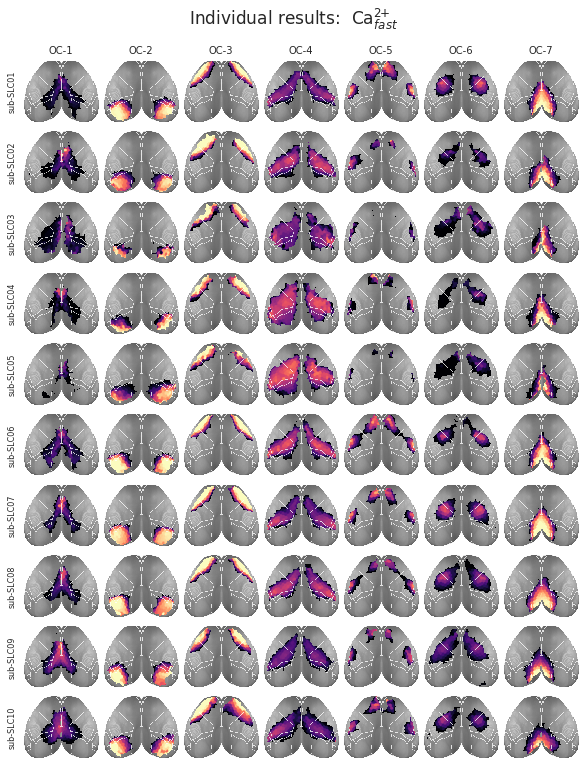

CPU times: user 1min 32s, sys: 9.54 s, total: 1min 42s
Wall time: 1min 42s


In [40]:
%%time


figs, sups = [], []
for mode, pi in pi_indiv.items():
    f, axes = create_figure(
        *pi.shape[:2],
        figsize=(8, 10),
        sharex='all',
        sharey='all',
        constrained_layout=True,
    )
    for i, j in itertools.product(range(10), range(7)):
        x = pi[i, j].copy()
        x[x <= kwargs['mask_thres']] = np.nan
        ax, _ = ctx2ax(x=x, ax=axes[i, j], **kwargs)
        if i == 0:
            ax.set_title(f"OC-{j + 1}", fontsize=10, y=1.03)
        if j == 0:
            ax.set_ylabel(mice.get_key(i + 1), fontsize=8, labelpad=8)
    remove_ticks(axes)
    s = f.suptitle(f"Individual results:  {mode}", fontsize=17, y=1.05)
    f.savefig(pjoin(save_dir, f"indiv_{mode2lbl[mode]}.png"), **kws_fig)
    sups.append(s)
    figs.append(f)
    plt.show()

In [41]:
save_fig(figs, sups, pjoin(save_dir, 'indiv.pdf'), multi=True)